**MSP - 2. projekt**

Lucie Svobodová (xsvobo1x@stud.fit.vutbr.cz)  
Statistika a pravděpodobnost (MSP)  
FIT VUT, 2023/2024  


In [1]:
# Import použitých knihoven
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
from scipy.stats import gamma, poisson, truncnorm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from matplotlib import cm
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns


# Úloha 1 - Bayesovské odhady

## a) Konjugované apriorní a aposteriorní rozdělení, prediktivní rozdělení

Předpokládáme, že počet připojení na internetovou síť za 1 ms je popsaný náhodnou veličinou s Poissonovým rozdělením s parametrem 𝜆, t.j. 𝑋~𝑃𝑜(𝜆).

O parametru 𝜆 máme následující expertní odhad: každých 5 ms by mělo nastat 10 připojení. 

Pozorovali jsme připojení po dobu 100 ms. Pozorovaní o počtu připojení za každou 1 ms jsou uvedené v souboru measurements.csv ve sloupci „úloha_1 a)“.

Vašim zadáním je z této expertní informace urči konjugované apriorní rozdělení k parametru Poissonova rozdělení a na základě pozorovaní určit aposteriorní rozdělení. Dále určete apriorní a aposteriorní prediktivní rozdělení pozorovaní. 

In [2]:
# Načtení dat
data = pd.read_csv("measurements.csv")
observed_data = data["uloha_1 a)"].values
observed_data = observed_data[~np.isnan(observed_data)]

# Expertní odhad parametru λ
lambda_expert = 10 / 5  # 10 připojení za 5 ms

### Apriorní a aposteriorní hustota parametru 𝜆

1) Do jednoho obrázku vykreslete apriorní a aposteriorní hustotou parametru Poissonova rozdělení 𝜆.

Konjugované apriorní rozdělení: Gamma  
Apriorní parametry: α, β  
α total occurrences in β intervals  
α = 10  
β = 5 

Z tabulky konjugovaných rozdělení určíme apriorní i aposteriorní rozdělení: gamma rozdělení.

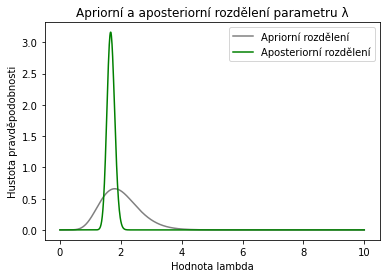

In [3]:
# Expertní odhad
a_prior = 10
b_prior = 5

# Posteriorní rozdělení
a_posterior = a_prior + sum(observed_data)
b_posterior = b_prior + len(observed_data)
lambda_posterior_mean = a_posterior / b_posterior

# Vykreslení apriorního a aposteriorního rozdělení parametru λ
x = np.linspace(0, 10, 1000)
prior = gamma.pdf(x, a_prior, scale=1/b_prior)
posterior = gamma.pdf(x, a_posterior, scale=1/b_posterior)
plt.plot(x, prior, label="Apriorní rozdělení", color="gray")
plt.plot(x, posterior, label="Aposteriorní rozdělení", color="green")
plt.legend()
plt.xlabel("Hodnota lambda")
plt.ylabel("Hustota pravděpodobnosti")
plt.title("Apriorní a aposteriorní rozdělení parametru λ")
plt.show()

### Apriorní a aposteriorní prediktivní hustota pozorovaní 𝑥

2) Do jednoho obrázku vykreslíte apriorní a aposteriorní prediktivní hustotou pozorovaní 𝑥 za jeden časový interval.

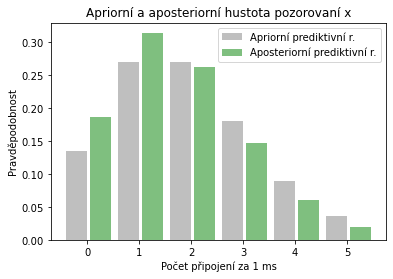

In [4]:
x_pred = np.arange(0, max(observed_data) + 1)
prior_pred = poisson.pmf(x_pred, lambda_expert)
posterior_pred = poisson.pmf(x_pred, lambda_posterior_mean)

width=0.4
plt.bar(x_pred-0.2, prior_pred, width, label="Apriorní prediktivní r.", alpha=0.5, color="gray")
plt.bar(x_pred+0.25, posterior_pred, width, label="Aposteriorní prediktivní r.", alpha=0.5, color="green")
plt.legend()
plt.xlabel("Počet připojení za 1 ms")
plt.ylabel("Pravděpodobnost")
plt.title("Apriorní a aposteriorní hustota pozorovaní x")
plt.show()

### Interval spolehlivosti pro parametr 𝜆

3) Sestrojte 95% interval spolehlivosti pro parametr 𝜆 z apriorního a aposteriorního rozdělení a porovnejte je.

In [5]:
# 95% interval spolehlivosti
prior_interval = gamma.interval(0.95, a_prior, scale=1/b_prior)
posterior_interval = gamma.interval(0.95, a_posterior, scale=1/b_posterior)
print("95% Apriorní interval:", prior_interval)
print("95% Aposteriorní interval:", posterior_interval)
print("")

# Výpočet šířek intervalů
aprior_width = prior_interval[1] - prior_interval[0]
print("Šířka apriorního intervalu:", aprior_width)
aposterior_width = posterior_interval[1] - posterior_interval[0]
print("Šířka aposteriorního intervalu:", aposterior_width)

95% Apriorní interval: (0.9590777392264868, 3.416960690283833)
95% Aposteriorní interval: (1.4376938284869922, 1.9327207471868797)

Šířka apriorního intervalu: 2.4578829510573463
Šířka aposteriorního intervalu: 0.49502691869988746


Odhad parametru $\lambda$ se zpřesňuje s přibývajícím množstvím dat (měření). 95% interval pro aposteriorní pravděpodobnost je z tohoto důvodu mnohem užší než pro apriorní pravděpodobnost.

### Aposteriorní bodové odhady parametru 𝜆

4) Vyberte si dva aposteriorní bodové odhady parametru 𝜆, porovnejte je a okomentujte jejich výběr.

In [6]:
# Porovnání dvou aposteriorních odhadů
posterior_median = (a_posterior - 1) / b_posterior
posterior_mean = a_posterior / b_posterior

print("Aposteriorní median parametru 𝜆: {:.2f}".format(posterior_median))
print("Aposteriorní střední hodnota parametru 𝜆: {:.2f}".format(posterior_mean))

Aposteriorní median parametru 𝜆: 1.67
Aposteriorní střední hodnota parametru 𝜆: 1.68


Za dva aposteriorní bodové odhady parametru $\lambda$ byla zvolena střední hodnota a medián. Jak je vidět na konkrétních hodnotách, medián se od střední hodnoty liší minimálně, což může znamenat, že daná distribuce je relativně symetrická a není moc ovlivněna extrémními hodnotami. To lze ostatně pozorovat i na grafu v úkolu 1.3.

### Apriorní a aposteriorní bodový odhad počtu pozorovaní

5) Vyberte si jeden apriorní a jeden aposteriorní bodový odhad počtu pozorovaní a
porovnejte je. 

In [7]:
print("Apriorní median parametru 𝜆: {:.2f}".format(lambda_expert))
print("Aposteriorní median parametru 𝜆: {:.2f}".format(posterior_median))

Apriorní median parametru 𝜆: 2.00
Aposteriorní median parametru 𝜆: 1.67


Při porovnání apriorního a aposteriorního mediánu je vidět, že se opět hodnota parametru $\lambda$ zpřesňovala a snížila. Měli bychom být pomocí aposteriorního odhadu s větší pravděpoeodobností schopni říct, že data byla vygenerována z tohoto aposteriorního rozdelení.

## b) Aproximace diskrétním rozdělením

Integrál ve jmenovateli Bayesově větě je ve většině praktických aplikací důvodem, proč nejsme schopní odvodit aposteriorní hustotu analyticky. Jeden ze způsobů, jak překonat tento problém a odhadnout parametr (ne vektor parametrů) je, že zvolíme diskrétní aproximaci a neřešitelný integrál přejde na sumu.

Poznámka:
Nyní řešíme odhad aposteriorní hustoty a parametrů v případě, že apriorní informace (hustota) je ve formě naměřených hodnot (sloupec „uloha_1 b)_prior“) a rozdělení procesu, který sledujete, je také ve tvaru naměřených hodnot (sloupec „uloha_1 b)_pozorovania“). Tedy místo zadání dvou hustot máme naměřené hodnoty a s pomocí tříděného statistického souboru odhadneme hustoty. Pak se plocha pod hustotou spočítá součtem četností (obdoba numerického počítání integrálu obdélníkovou metodou).

Víme, že délka zpracování procesu v milisekundách ms má odseknuté normální rozdělení (truncated normal distribution) s parametry
𝜇 = 3, 𝜎
2 = 1, 𝑎 = 1

Naší úlohou je odhadnout parametr 𝑏, t.j. maximální dobu trvání procesu. Máme historické záznamy o jeho délce trvání (sloupec „uloha 1 a)_prior“) na počítačích podobné výkonové řady. Provedli jsme sérii pozorovaní po 10, číslo série pozorovaní v tabulce v sloupci „skupina“. Z těchto záznamů vyjádříte apriorní informaci o parametru 𝑏.

Ve sloupci „uloha_1 b)_pozorovania“ jsou naše pozorování délky trvání procesu Vyjádřete funkci věrohodnosti (sloupec „uloha_1 b)_pozorovania“) (v tomto případe také jen její diskrétní aproximace) a následně diskrétní aposteriorní hustotu.

### Apriorní, aposteriorní hustota a funkce věrohodnosti

1) Do jednoho grafu vykreslíte apriorní, aposteriorní hustotou a funkci věrohodnosti.
Funkci věrohodnosti normujte tak, aby jej součet byl 1 kvůli porovnatelnosti
v obrázku.

In [8]:
# Načtení dat
data = pd.read_csv("measurements.csv")
data_1b_prior = data[['uloha_1 b)_prior', 'skupina']].dropna()
data_1b_pozorovani = data['uloha_1 b)_pozorování'].dropna().astype(float)

Vypočteme apriorní hustotu parametru b.

In [9]:
# Apriorní hustota parametru b
bins = 40
# Max v každé skupině
max_values_idx = data_1b_prior.groupby('skupina')['uloha_1 b)_prior'].idxmax()
new_df = data_1b_prior.loc[max_values_idx]

# Tvorba diskrétního rozdělení
counts = pd.cut(new_df['uloha_1 b)_prior'], bins).value_counts().sort_index()
means = new_df.groupby(pd.cut(new_df['uloha_1 b)_prior'], bins), observed=False).mean()
mean_occur = pd.DataFrame({'mean': means['uloha_1 b)_prior'], 'occur': counts})
mean_occur.reset_index(inplace=True)
total_occurrences = mean_occur['occur'].sum()
mean_occur['prob'] = mean_occur['occur'] / total_occurrences

Následně vypočteme věrohodnostní funkci.

In [10]:
# Věrohodnostní funkce
mu = 3
sigma = 1
a = 1
probs = []
for i, b in enumerate(mean_occur['mean']):
    a_scaled = (a- mu) / sigma
    b_scaled = (b - mu) / sigma
    tr = truncnorm(a_scaled, b_scaled, loc=mu, scale=sigma)
    prob = np.prod([tr.pdf(d) for d in data_1b_pozorovani])
    probs.append(prob)

# Normalizace
likelihood = np.array(probs) / np.sum(probs)


Jako poslední vypočteme aposteriorní rozdělení a vykreslíme finální graf.

In [11]:
# aposter_1: (d_j | b_i) * h(b_i)
aposter_1 = np.array([prob * prior_prob for prob, prior_prob in zip(probs, mean_occur['prob'])])

# poster: Σ_i(Π_j(d_j | b_i) * h(b_i) / Σ_i(Π_j(d_j | b_i) * h(b_i))
poster = aposter_1 / np.sum(aposter_1)


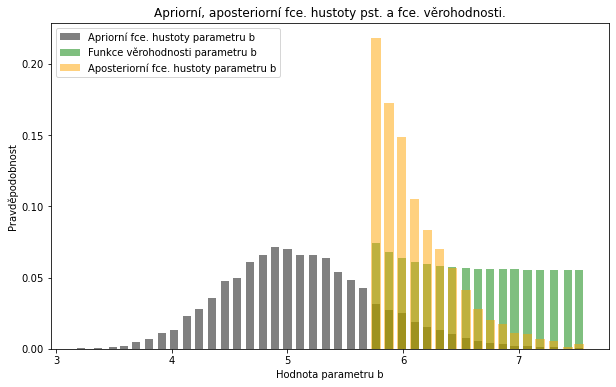

In [12]:
# Graf
plt.figure(figsize=(10, 6))
plt.bar(mean_occur['mean'], mean_occur['prob'], label='Apriorní fce. hustoty parametru b', color='gray', width=0.07)
plt.bar(mean_occur['mean'], likelihood, width=0.07, label='Funkce věrohodnosti parametru b', color='green', alpha=0.5)
plt.bar(mean_occur['mean'], poster, width=0.08, label='Aposteriorní fce. hustoty parametru b', color='orange', alpha=0.5)
plt.xlabel('Hodnota parametru b')
plt.ylabel('Pravděpodobnost')
plt.title('Apriorní, aposteriorní fce. hustoty pst. a fce. věrohodnosti.')
plt.legend(loc='upper left')
plt.show()


### Interval spolehlivosti

2) Z aposteriorní hustoty určete 95% interval spolehlivosti (konfidenční interval) pro
parametr 𝑏.

In [13]:
# Náhodné vzorkování
rnd = np.random.choice(mean_occur['mean'].tolist(), size=10000, p=poster)

# 95% interval spolehlivosti
lower_bound, upper_bound = np.percentile(rnd, [2.5, 97.5])
print(f"95% Interval spolehlivosti (konfidenční interval): ({lower_bound:.2f}, {upper_bound:.2f})")


95% Interval spolehlivosti (konfidenční interval): (5.77, 6.96)


### Bodové odhady parametru 𝑏

3) Vyberte dva bodové odhady parametru 𝑏 a spočítejte je.

In [14]:
# Výběr a výpočet průměru a mediánu
mean = np.mean(rnd)
median = np.median(rnd)

print("Bodové odhady z posteriorní funkce hustoty pravděpodobnosti parametru b")
print(f"Průměr: {mean:.4f}")
print(f"Medián: {median:.4f}")


Bodové odhady z posteriorní funkce hustoty pravděpodobnosti parametru b
Průměr: 6.1115
Medián: 5.9883


Za bodové odhady parametru $b$ byly opět zvoleny průměr a medián, které, stejně jako v předchozí úloze, naznačují, že aposteriorní rozdělení dat je poměrně symetrické, protože mezi mediánem a střední hodnotou není výrazný rozdíl, a taky že data nejsou velmi ovlivněna extrémními hodnotami.

# Úloha 2 - Regrese

Disclaimer: data (včetně „příběhu“) jsou vygenerovaná a nemusí mít dobrý obraz v realitě. Berte proto prosím výsledky z regrese s „rezervou“. Díky.

Podařilo se Vám pomocí stroje času vrátit do doby „zlatého věku“ sociálních sítí a rozhodli jste se konkurovat Facebooku a Twitteru. V souboru Data_v1.0.csv máte k dispozici záznamy od více než 500 uživatelů o rychlosti odezvy (sloupec ping [ms]) během používání Vaší aplikace. Ke každému zápisu máte navíc k dispozici o počtu uživatelů (sloupec ActiveUsers) v daném okamžiku, o procentu uživatelů, kteří momentálně interagují s prezentovaným obsahem (sloupec InteractingPct), o procentu uživatelů, kteří jen tupě scrollují po Vaší obdobě timeline/twitterfeedu (sloupec ScrollingPct) a o operačním systému zařízení ze kterého se uživatel připojil (OSType).

## Určení regresního modelu

1) Pomocí zpětné eliminace určete vhodný regresní model. Za výchozí „plný“ model
považujte plný kvadratický model (všechny interakce druhého řádu a všechny druhé
mocniny, které dávají smysl).
- Zapište rovnici Vašeho finálního modelu.
- Diskutujte splnění předpokladů lineární regrese a základní regresní
diagnostiky.
- Pokud (až během regresního modelování) identifikujete některé „extrémně
odlehlé hodnoty“ můžete ty „nejodlehlejší“ hodnoty, po alespoň krátkém
zdůvodnění, vyřadit.

Modelovaná data:

In [15]:
# load data to df dataframe
df = pd.read_csv('Data_v1.0.csv')

# print dataframe
print(df)

      OSType  ActiveUsers  InteractingPct  ScrollingPct  Ping [ms]
0        iOS         4113          0.8283        0.1717         47
1        iOS         7549          0.3461        0.6539         46
2    Windows         8855          0.2178        0.7822         55
3    Android         8870          0.0794        0.9206         56
4      MacOS         9559          0.7282        0.2718         76
..       ...          ...             ...           ...        ...
497      iOS         5315          0.1974        0.8026         28
498    MacOS         1392          0.2373        0.7627         24
499      iOS         6014          0.8112        0.1888         54
500  Android         5118          0.2345        0.7655         39
501    MacOS         2660          0.9390        0.0610         55

[502 rows x 5 columns]


Data nejprve znormalizujeme, převedeme je do intervalu <-1, 1> pomocí metody Min-Max normalizace. Nebudeme normalizovat pouze závislou proměnnou Ping a kategorické atributy.

In [16]:
# min-max normalisation
scaler = MinMaxScaler(feature_range=(-1, 1))
numeric_columns = df.select_dtypes(include=['number']).columns
print(numeric_columns)
numeric_columns = numeric_columns.drop('Ping [ms]', errors='ignore')
print(numeric_columns)
data_values = df.values
normalized_data = scaler.fit_transform(data_values[:, df.columns.isin(numeric_columns)])
# create a new DataFrame with the normalised data
normalized_df = pd.DataFrame(df.copy())
normalized_df.loc[:, numeric_columns] = normalized_data
df = normalized_df

print("Normalised data:")
print(df)

Index(['ActiveUsers', 'InteractingPct', 'ScrollingPct', 'Ping [ms]'], dtype='object')
Index(['ActiveUsers', 'InteractingPct', 'ScrollingPct'], dtype='object')
Normalised data:
      OSType  ActiveUsers  InteractingPct  ScrollingPct  Ping [ms]
0        iOS    -0.191837        0.658752     -0.658752         47
1        iOS     0.509388       -0.307484      0.307484         46
2    Windows     0.775918       -0.564573      0.564573         55
3    Android     0.778980       -0.841900      0.841900         56
4      MacOS     0.919592        0.458171     -0.458171         76
..       ...          ...             ...           ...        ...
497      iOS     0.053469       -0.605450      0.605450         28
498    MacOS    -0.747143       -0.525498      0.525498         24
499      iOS     0.196122        0.624487     -0.624487         54
500  Android     0.013265       -0.531109      0.531109         39
501    MacOS    -0.488367        0.880573     -0.880573         55

[502 rows x 5 colum

V datech se vyskytuje kategorická proměnná OSType. Pomocí one-hot encoding z ní vytvoříme numerické proměnné. 

In [17]:
# perform one-hot encoding for the column OSType
df = pd.get_dummies(df, columns=['OSType'], prefix='OSType', drop_first=True)

# convert bool to int
for column in df.columns:
    if df[column].dtype == bool:
        df[column] = df[column].astype(float)

# converted dataframe
print(df)

     ActiveUsers  InteractingPct  ScrollingPct  Ping [ms]  OSType_MacOS  \
0      -0.191837        0.658752     -0.658752         47           0.0   
1       0.509388       -0.307484      0.307484         46           0.0   
2       0.775918       -0.564573      0.564573         55           0.0   
3       0.778980       -0.841900      0.841900         56           0.0   
4       0.919592        0.458171     -0.458171         76           1.0   
..           ...             ...           ...        ...           ...   
497     0.053469       -0.605450      0.605450         28           0.0   
498    -0.747143       -0.525498      0.525498         24           1.0   
499     0.196122        0.624487     -0.624487         54           0.0   
500     0.013265       -0.531109      0.531109         39           0.0   
501    -0.488367        0.880573     -0.880573         55           1.0   

     OSType_Windows  OSType_iOS  
0               0.0         1.0  
1               0.0         1.0

Nyní zajistíme, že se mezi modelovanými daty nevyskytuje lineární závislost. To zjistíme pomocí matice korelace.

In [18]:
# calculate the correlation matrix
corr_matrix = df.corr()
print(corr_matrix)

                ActiveUsers  InteractingPct  ScrollingPct  Ping [ms]  \
ActiveUsers        1.000000        0.040275     -0.040275   0.693499   
InteractingPct     0.040275        1.000000     -1.000000   0.406957   
ScrollingPct      -0.040275       -1.000000      1.000000  -0.406957   
Ping [ms]          0.693499        0.406957     -0.406957   1.000000   
OSType_MacOS      -0.000136        0.086466     -0.086466   0.333107   
OSType_Windows     0.003135       -0.016964      0.016964   0.047783   
OSType_iOS        -0.063206       -0.062634      0.062634  -0.360491   

                OSType_MacOS  OSType_Windows  OSType_iOS  
ActiveUsers        -0.000136        0.003135   -0.063206  
InteractingPct      0.086466       -0.016964   -0.062634  
ScrollingPct       -0.086466        0.016964    0.062634  
Ping [ms]           0.333107        0.047783   -0.360491  
OSType_MacOS        1.000000       -0.371550   -0.341322  
OSType_Windows     -0.371550        1.000000   -0.334506  
OSType_iOS

Z korelační matice je vidět, že v datech je lineární závislost mezi proměnnými InteractingPct a ScrollingPct. Odstraníme tedy jednu z těchto proměnných, například proměnnou ScrollingPct. Mezi jinými proměnnými není tak vysoká závislost a proto všechny zbývající proměnné ponecháme.

In [19]:
# drop ScrollingPct column
df.drop(['ScrollingPct'], axis=1, inplace=True)
print(df)

     ActiveUsers  InteractingPct  Ping [ms]  OSType_MacOS  OSType_Windows  \
0      -0.191837        0.658752         47           0.0             0.0   
1       0.509388       -0.307484         46           0.0             0.0   
2       0.775918       -0.564573         55           0.0             1.0   
3       0.778980       -0.841900         56           0.0             0.0   
4       0.919592        0.458171         76           1.0             0.0   
..           ...             ...        ...           ...             ...   
497     0.053469       -0.605450         28           0.0             0.0   
498    -0.747143       -0.525498         24           1.0             0.0   
499     0.196122        0.624487         54           0.0             0.0   
500     0.013265       -0.531109         39           0.0             0.0   
501    -0.488367        0.880573         55           1.0             0.0   

     OSType_iOS  
0           1.0  
1           1.0  
2           0.0  
3  

Nyní můžeme vytvořit plný kvadratický model. Ten tedy obsahuje všechny interakce druhého řádu, kromě interakcí původních kategorických atributů mezi sebou, a všechny mocniny druhého řádu, kromě druhých mocnin původních kategorických atributů - ty nemají smysl. 

Výchozí kvadratický model:  
$Ping = \beta_1*ActiveUsers + \beta_2*InteractingPct + \beta_3*OSType\_MacOS + \beta_4*OSType\_Windows + \beta_5*OSType\_iOS + \beta_6*ActiveUsers*InteractingPct + \beta_7*ActiveUsers*OSType\_MacOS + \beta_8*ActiveUsers*OSType\_Windows + \beta_9*ActiveUsers*OSType\_iOS + \beta_{10}*InteractingPct*OSType\_MacOS + \beta_{11}*InteractingPct*OSType\_Windows + \beta_{12}*InteractingPct*OSType\_iOS + \beta_{13}*ActiveUsers^2 + \beta_{14}*InteractingPct^2 + \epsilon$
kde $\beta_1 - \beta_{14}$ jsou koeficienty jednotlivých proměnných a $\epsilon$ je konstanta.

Pro tento model vypočteme jednotlivé charakteristiky:

In [20]:
# full quadratic model
formula_x_y = 'ActiveUsers + InteractingPct + OSType_MacOS + OSType_Windows + OSType_iOS'
formula_xy = 'ActiveUsers:InteractingPct + ActiveUsers:OSType_MacOS + ActiveUsers:OSType_Windows + ActiveUsers:OSType_iOS + InteractingPct:OSType_MacOS + InteractingPct:OSType_Windows + InteractingPct:OSType_iOS'
formula_x2_y2 = 'I(ActiveUsers**2) + I(InteractingPct**2)'
formula = 'Q("Ping [ms]") ~ ' + formula_x_y + ' + ' + formula_xy + ' + ' + formula_x2_y2

model = smf.ols(formula=formula, data=df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         Q("Ping [ms]")   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     187.9
Date:                Sat, 16 Dec 2023   Prob (F-statistic):          5.18e-186
Time:                        11:59:45   Log-Likelihood:                -1598.4
No. Observations:                 502   AIC:                             3227.
Df Residuals:                     487   BIC:                             3290.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

Pro zjištění potenciální multikolinearity v datech použijeme indikátor VIF.

In [21]:
# VIF
X = pd.DataFrame(model.exog, columns=model.exog_names)
vif = pd.Series([variance_inflation_factor(X.values, i) 
                 for i in range(X.shape[1])], 
                 index=X.columns)
vif_df = vif.to_frame()
vif_df.columns = ['VIF']
print(vif_df)
# correlation of predictors
print('\n\n\n')
print(X.corr()) 

                                    VIF
Intercept                      6.983663
ActiveUsers                    5.181035
InteractingPct                 4.831890
OSType_MacOS                   1.746357
OSType_Windows                 1.725463
OSType_iOS                     1.673655
ActiveUsers:InteractingPct     1.059143
ActiveUsers:OSType_MacOS       2.385958
ActiveUsers:OSType_Windows     2.434729
ActiveUsers:OSType_iOS         2.231460
InteractingPct:OSType_MacOS    2.488988
InteractingPct:OSType_Windows  2.098669
InteractingPct:OSType_iOS      2.214159
I(ActiveUsers ** 2)            1.145080
I(InteractingPct ** 2)         1.029060




                               Intercept  ActiveUsers  InteractingPct  \
Intercept                            NaN          NaN             NaN   
ActiveUsers                          NaN     1.000000        0.040275   
InteractingPct                       NaN     0.040275        1.000000   
OSType_MacOS                         NaN    -0.000136        0.0

Všechny hodnoty VIF jsou v přijatelném rozmezí (1-10) a ani korelace prediktorů nezobrazuje žádnou výraznou korelaci, kterou by bylo potřeba zajistit.

Dále se podíváme, zda se v datech nevyskytují nějaké odlehlé hodnoty. To zjistíme pomocí grafů využívajících residua.

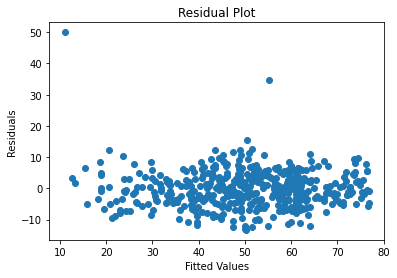

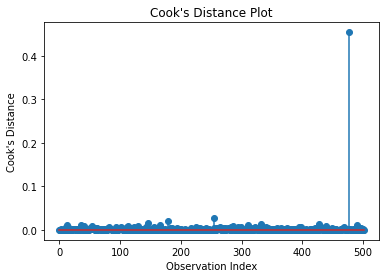

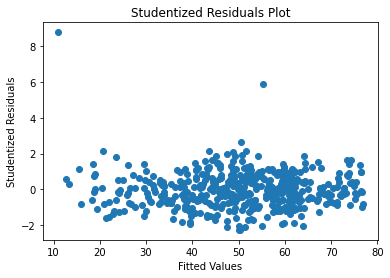

In [22]:
# outliers
# residual analysis
residuals = results.resid
plt.scatter(results.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Cook's distance
influence = results.get_influence()
cook_distance = influence.cooks_distance[0]
plt.stem(cook_distance)
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance Plot")
plt.show()

# studentized residuals
studentized_residuals = influence.resid_studentized_internal
plt.scatter(results.fittedvalues, studentized_residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Studentized Residuals')
plt.title('Studentized Residuals Plot')
plt.show()


Všechny výše uvedené grafy ukazují, že v datech se nějaké odlehlé hodnoty nachází. Odstraníme je tedy pomocí kritéria pro standardizovaná residua.

In [23]:
print("Length before removing outliers:", len(df))

# identify outliers using standardized residuals
standardized_residuals = results.resid / results.mse_resid**0.5
outlier_indices = np.abs(standardized_residuals) > 3

# remove rows with outliers
df = df[~outlier_indices].copy()

print("Length after removing outliers:", len(df))

Length before removing outliers: 502
Length after removing outliers: 500


Nyní můžeme začít provádět metodu zpětné eliminace. Z výše uvedeného výchozího plného kvadratického modelu je vidět, že nejvyšší p-hodnotu má prvek InteractingPct*OSType_iOS. Z modelu jej tedy vypustíme a přepočteme celou regresi znovu.

In [24]:
# remove InteractingPct:OSType_iOS
formula_x_y = 'ActiveUsers + InteractingPct + OSType_MacOS + OSType_Windows + OSType_iOS'
formula_xy = 'ActiveUsers:InteractingPct + ActiveUsers:OSType_MacOS + ActiveUsers:OSType_Windows + ActiveUsers:OSType_iOS + InteractingPct:OSType_MacOS + InteractingPct:OSType_Windows'
formula_x2_y2 = 'I(ActiveUsers**2) + I(InteractingPct**2)'
formula = 'Q("Ping [ms]") ~ ' + formula_x_y + ' + ' + formula_xy + ' + ' + formula_x2_y2

model = smf.ols(formula=formula, data=df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         Q("Ping [ms]")   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     268.0
Date:                Sat, 16 Dec 2023   Prob (F-statistic):          5.23e-212
Time:                        11:59:45   Log-Likelihood:                -1528.3
No. Observations:                 500   AIC:                             3085.
Df Residuals:                     486   BIC:                             3144.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

Opět spočteme koeficienty VIF.

In [25]:
# VIF
X = pd.DataFrame(model.exog, columns=model.exog_names)
vif = pd.Series([variance_inflation_factor(X.values, i) 
                 for i in range(X.shape[1])], 
                 index=X.columns)
vif_df = vif.to_frame()
vif_df.columns = ['VIF']
print(vif_df)
# correlation of predictors
# print('\n\n\n')
# print(X.corr()) 

                                    VIF
Intercept                      6.951084
ActiveUsers                    5.135917
InteractingPct                 2.226022
OSType_MacOS                   1.745153
OSType_Windows                 1.718512
OSType_iOS                     1.653168
ActiveUsers:InteractingPct     1.040038
ActiveUsers:OSType_MacOS       2.347443
ActiveUsers:OSType_Windows     2.433049
ActiveUsers:OSType_iOS         2.231330
InteractingPct:OSType_MacOS    1.693627
InteractingPct:OSType_Windows  1.517010
I(ActiveUsers ** 2)            1.156715
I(InteractingPct ** 2)         1.026614


Z nově přepočteného modelu lze vyčíst, že se zde stále objevují proměnné, které mají p-hodnotu vyšší než 0.05. Proto vypustíme tu proměnnou, která má nejvyšší p-hodnotu - proměnnou InteractingPct*OSType_Windows.


In [26]:
# remove InteractingPct:OSType_Windows
formula_x_y = 'ActiveUsers + InteractingPct + OSType_MacOS + OSType_Windows + OSType_iOS'
formula_xy = 'ActiveUsers:InteractingPct + ActiveUsers:OSType_MacOS + ActiveUsers:OSType_Windows + ActiveUsers:OSType_iOS + InteractingPct:OSType_MacOS'
formula_x2_y2 = 'I(ActiveUsers**2) + I(InteractingPct**2)'
formula = 'Q("Ping [ms]") ~ ' + formula_x_y + ' + ' + formula_xy + ' + ' + formula_x2_y2

model = smf.ols(formula=formula, data=df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         Q("Ping [ms]")   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     291.0
Date:                Sat, 16 Dec 2023   Prob (F-statistic):          3.02e-213
Time:                        11:59:45   Log-Likelihood:                -1528.3
No. Observations:                 500   AIC:                             3083.
Df Residuals:                     487   BIC:                             3137.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [27]:
# VIF
X = pd.DataFrame(model.exog, columns=model.exog_names)
vif = pd.Series([variance_inflation_factor(X.values, i) 
                 for i in range(X.shape[1])], 
                 index=X.columns)
vif_df = vif.to_frame()
vif_df.columns = ['VIF']
print(vif_df)
# correlation of predictors
# print('\n\n\n')
# print(X.corr()) 

                                  VIF
Intercept                    6.948449
ActiveUsers                  5.133434
InteractingPct               1.496289
OSType_MacOS                 1.744351
OSType_Windows               1.710306
OSType_iOS                   1.652404
ActiveUsers:InteractingPct   1.039673
ActiveUsers:OSType_MacOS     2.346818
ActiveUsers:OSType_Windows   2.419584
ActiveUsers:OSType_iOS       2.231113
InteractingPct:OSType_MacOS  1.468419
I(ActiveUsers ** 2)          1.156556
I(InteractingPct ** 2)       1.026614


Dále vypustíme proměnnou InteractingPct*OSType_MacOS a přepočteme model.

In [28]:
# remove InteractingPct:OSType_MacOS
formula_x_y = 'ActiveUsers + InteractingPct + OSType_MacOS + OSType_Windows + OSType_iOS'
formula_xy = 'ActiveUsers:InteractingPct + ActiveUsers:OSType_MacOS + ActiveUsers:OSType_Windows + ActiveUsers:OSType_iOS'
formula_x2_y2 = 'I(ActiveUsers**2) + I(InteractingPct**2)'
formula = 'Q("Ping [ms]") ~ ' + formula_x_y + ' + ' + formula_xy + ' + ' + formula_x2_y2

model = smf.ols(formula=formula, data=df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         Q("Ping [ms]")   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     317.9
Date:                Sat, 16 Dec 2023   Prob (F-statistic):          1.81e-214
Time:                        11:59:45   Log-Likelihood:                -1528.4
No. Observations:                 500   AIC:                             3081.
Df Residuals:                     488   BIC:                             3131.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [29]:
# VIF
X = pd.DataFrame(model.exog, columns=model.exog_names)
vif = pd.Series([variance_inflation_factor(X.values, i) 
                 for i in range(X.shape[1])], 
                 index=X.columns)
vif_df = vif.to_frame()
vif_df.columns = ['VIF']
print(vif_df)
# correlation of predictors
# print('\n\n\n')
# print(X.corr()) 

                                 VIF
Intercept                   6.948266
ActiveUsers                 5.130748
InteractingPct              1.033978
OSType_MacOS                1.741646
OSType_Windows              1.710299
OSType_iOS                  1.652048
ActiveUsers:InteractingPct  1.039655
ActiveUsers:OSType_MacOS    2.346813
ActiveUsers:OSType_Windows  2.419399
ActiveUsers:OSType_iOS      2.230755
I(ActiveUsers ** 2)         1.155714
I(InteractingPct ** 2)      1.025415


Dále z regresního modelu vypustíme proměnnou $InteractingPct^2$ a přepočítáme jej.

In [30]:
# full quadratic model
formula_x_y = 'ActiveUsers + InteractingPct + OSType_MacOS + OSType_Windows + OSType_iOS'
formula_xy = 'ActiveUsers:InteractingPct + ActiveUsers:OSType_MacOS + ActiveUsers:OSType_Windows + ActiveUsers:OSType_iOS'
formula_x2_y2 = 'I(ActiveUsers**2)'
formula = 'Q("Ping [ms]") ~ ' + formula_x_y + ' + ' + formula_xy + ' + ' + formula_x2_y2

model = smf.ols(formula=formula, data=df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         Q("Ping [ms]")   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     349.9
Date:                Sat, 16 Dec 2023   Prob (F-statistic):          1.28e-215
Time:                        11:59:46   Log-Likelihood:                -1528.7
No. Observations:                 500   AIC:                             3079.
Df Residuals:                     489   BIC:                             3126.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

Z posledního regresního modelu je vidět, už se v něm jiná p-hodnota s hodnotou vyšší než 0.05 nevyskytuje. Nalezli jsme tedy výsledný kvadratický model s charakteristikami vypsanými výše.  

**Finální regresní model**
Po dosazení bodových odhadů do rovnice získáváme následující rovnici:
$Ping = 21.0936*ActiveUsers + 9.4004*InteractingPct + 8.2538*OSType\_MacOS + 3.9905*OSType\_Windows - 5.2566*OSType\_iOS - 8.2957*ActiveUsers*InteractingPct + 8.5302*ActiveUsers*OSType\_MacOS - 3.6770*ActiveUsers*OSType\_Windows - 5.2718*ActiveUsers*OSType\_iOS - 11.1165*ActiveUsers^2 + 49.7071$


### Diskuse ke splnění předpokladů lineární regrese a základním regresním diagnostikám

#### Multikolinearita

Ke zjištění míry multikolinearity použijeme hodnoty VIF (Variance Inflation Factor) pro každý nezávislý atribut. Hodnoty VIT mezi 1 a 10 se považují za přijatelné, a finální model se v tomto rozmezí pohybuje. U atributů, které mají nejvyšší hodnoty VIF by mohly mít problémy s kolinearitou (např. atribut ActiveUsers), nicméně vzhledem k tomu, že se stále pohybujeme v přijatelném rozmezí, můžeme říct, že z hlediska multikolinearity model splňuje předpoklad lineární regrese.


In [31]:
# VIF
X = pd.DataFrame(model.exog, columns=model.exog_names)
vif = pd.Series([variance_inflation_factor(X.values, i) 
                 for i in range(X.shape[1])], 
                 index=X.columns)
vif_df = vif.to_frame()
vif_df.columns = ['VIF']
print(vif_df)

                                 VIF
Intercept                   5.743471
ActiveUsers                 5.117350
InteractingPct              1.033276
OSType_MacOS                1.728938
OSType_Windows              1.709236
OSType_iOS                  1.648767
ActiveUsers:InteractingPct  1.039647
ActiveUsers:OSType_MacOS    2.336903
ActiveUsers:OSType_Windows  2.409856
ActiveUsers:OSType_iOS      2.217796
I(ActiveUsers ** 2)         1.155160


#### Homoskedasticita

Homoskedasticita znamená, že rozptyl reziduí je konstantní při různých hodnotách predikcí. Homoskedasticitu finálního modelu můžeme tedy zjistit pomocí grafu reziduí proti predikcím. Graf by neměl vykazovat žádný vzor nebo souvislost, což na našem finálním modelu nevykazuje.

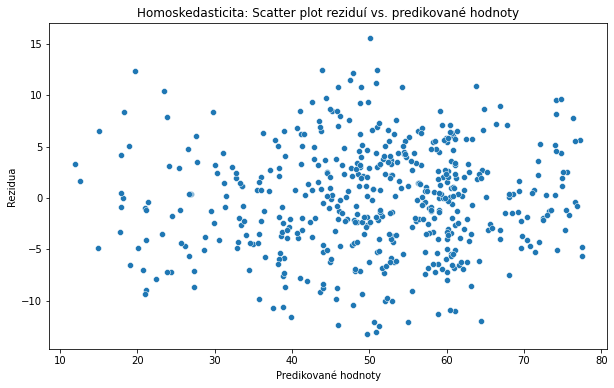

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=results.fittedvalues, y=residuals)
plt.title('Homoskedasticita: Scatter plot reziduí vs. predikované hodnoty')
plt.xlabel('Predikované hodnoty')
plt.ylabel('Rezidua')
plt.show()

#### Normální rozdělení reziduí

Normální rozdělení reziduí je možné posoudit z Q-Q grafu pro posouzení normálního rozdělení. Body ležící přibližně na diagonální čáře naznačují, že rozdělení reziduí je podobné normálnímu rozdělení s že model celkem dobře popisuje variabilitu dat. Lehké uklonění nahoru na levém kraji grafu a dolu na pravém konci grafu může naznačovat, že v datech jsou stále nějaké odlehlé hodnoty, nicméně je tam pouze malá část hodnot a uklonění od přímky není nijak výrazné, díky čemuž můžeme opět říct, že model z tohoto hlediska splňuje předpoklad lineární regrese.

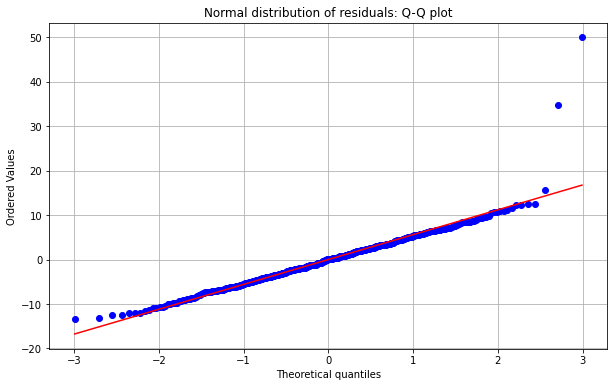

In [33]:
# normal distribution of residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals, plot=plt, fit=True)
plt.title('Normal distribution of residuals: Q-Q plot')
plt.grid(True)
plt.show()

#### Lineární nezávislost

K ověření nezávislosti reziduí je možné použít bodový graf, kde vykreslíme rezidua v pořadí pozorování. Rezidua by měla ideálně náhodně rozmístěna kolem nuly bez jakéhokoliv trendu nebo systematického vzoru. Toto pro náš finální model platí, jak je vidět z následujícího grafu.

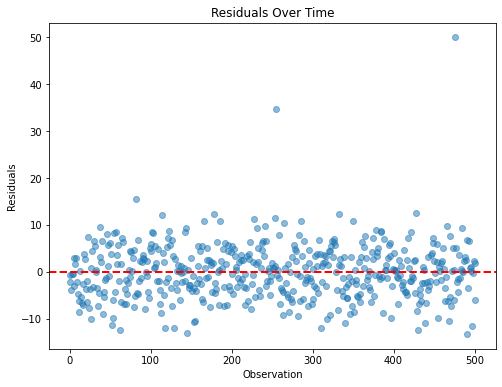

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(residuals)), residuals, alpha=0.5)
plt.title('Residuals Over Time')
plt.xlabel('Observation')
plt.ylabel('Residuals')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.show()

Dále je možné nezávislost posoudit pomocí Durbin-Watsonova testu. Z OLS přehledu můžeme vyčíst, že hodnota Durbin-Watson je rovna 1.99. Tato hodnota je velmi blízko hodnotě 2, která naznačuje minimální pozitivní autokorelaci a potvrzuje tak, že rezidua jsou téměř nezávislá. 

#### Odlehlé hodnoty

Odlehlé hodnoty je možné detekovat například s využitím grafu standardizovaných nebo studentizovaných reziduí nebo Cookovy vzdálenosti. Z grafů níže je vidět, že žádné extrémně odlehlé hodnoty se zde již nevyskytují (extrémně odlehlé hodnoty byly odstraněny již na začátku regresního modelování). Dále je možné pro zjištění odlehlých hodnot využít například výpočet  pomocí Leverage, kde hodnoty s větším leverage mohou mít větší vliv na odhady regresních koeficientů.

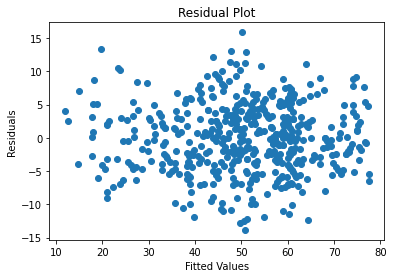

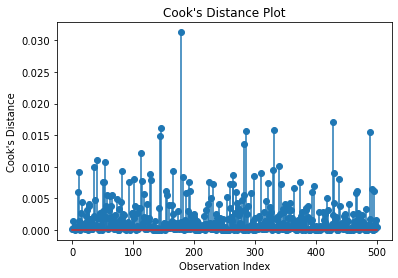

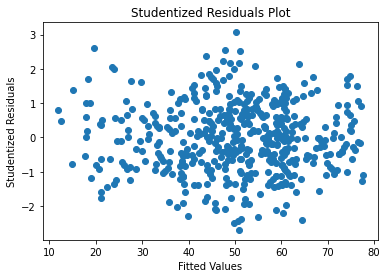

In [35]:
# outliers
# residual analysis
residuals = results.resid
plt.scatter(results.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Cook's distance
influence = results.get_influence()
cook_distance = influence.cooks_distance[0]
plt.stem(cook_distance)
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance Plot")
plt.show()

# studentized residuals
studentized_residuals = influence.resid_studentized_internal
plt.scatter(results.fittedvalues, studentized_residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Studentized Residuals')
plt.title('Studentized Residuals Plot')
plt.show()


## Nejproblematičtější hodnota odezvy

2) Pomocí Vašeho výsledného modelu identifikujte, pro které nastavení parametrů má odezva nejproblematičtější hodnotu.

Nejproblematičtější hodnota bude maximální hodnota Ping. Pomocí finálního modelu zjistíme, jaká nastavení parametrů tuto maximální hodnotu způsobují.

In [36]:
index_max_ping = results.predict().argmax()
values_at_max_ping = df.iloc[index_max_ping]
print(values_at_max_ping)

ActiveUsers        0.939592
InteractingPct     0.948703
Ping [ms]         72.000000
OSType_MacOS       1.000000
OSType_Windows     0.000000
OSType_iOS         0.000000
Name: 10, dtype: float64


## Průměrná hodnota odezvy pro uživatele s Windows

3) Odhadněte hodnotu odezvy uživatele s Windows, při průměrném nastavení ostatních parametrů a vypočtěte konfidenční interval a predikční interval pro toto nastavení.

In [37]:
# average settings
average_settings = {
    'ActiveUsers': df['ActiveUsers'].mean(),
    'InteractingPct': df['InteractingPct'].mean(),
    'OSType_MacOS': 0,
    'OSType_iOS': 0,
    'OSType_Windows': 1
}

# get the prediction for the average_settings
prediction = results.get_prediction(average_settings)

# get the mean response from prediction
mean_response = prediction.predicted_mean
print(f"Průměrná hodnota odezvy uživatele s Windows: {mean_response[0]:.4f}")

# find out the prediction and confidence intervals
pred = prediction.summary_frame(alpha=0.05)
# confidence interval - mean_ci
print()
print("Konfidenční interval:")
print("[", pred['mean_ci_lower'][0], ", ", pred['mean_ci_upper'][0], "]")

# prediction interval - obs_ci
print()
print("Predikční interval:")
print("[", pred['obs_ci_lower'][0], ", ", pred['obs_ci_upper'][0], "]")

Průměrná hodnota odezvy uživatele s Windows: 55.0027

Konfidenční interval:
[ 53.97214495766267 ,  56.033232440855436 ]

Predikční interval:
[ 44.724692737802556 ,  65.28068466071555 ]


## Vhodnost modelu

4) Na základě jakýchkoli vypočtených charakteristik argumentujte, zdali je Váš model
„vhodný“ pro další použití.

Vhodnost modelu pro další použití můžeme posoudit pomocí koeficientu R-squared a Adjusted R-squared z výsledků finálního regresního modelu.

Koeficient determinace, neboli R-squared, měří podíl variability závislé proměnné vysvětlené modelovanými nezávislými proměnnými. Pokud se hodnota koeficientu R-squared blíží hodnotě 1, model vysvětluje většinu variability. V našem modelu je hodnota R-squared rovna0.877, což znamená, že 87.7% variability v závislé proměnné Ping je vysvětleno modelovanými proměnnými.

Koeficient Adjusted R-squared upřesňuje koeficient R-squared o počet nezávislých proměnných a velikost vzorku. Vzhledem k tomu, že koeficient Adjusted R-squared je roven hodnotě 0.875, která je velmi blízká hodnotě R-squared, můžeme říct, že model je poměrně vhodný pro další použití.

Společně s informací, že byly splněny předpoklady lineární regrese můžeme usoudit, že model by mohl být vhodný pro další modelování. 